In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/maria/Documents/UFAL/Ciencia de dados/Projeto/data/APOSENTADOS_112020_FULL.csv',low_memory=False, error_bad_lines=False, sep=';')

#Tratamento dos dados
#Drop colunas que não vão ser usadas
aposentados = df.drop(['Nome', 'CPF', 'Matricula', 'Sigla Orgao', 'Orgao vinculacao', 'Padrao',
        'Referencia', 'Nivel', 'Fund legal aposentadoria', 'Portaria aposentadoria'], axis=1)

# Tirando datas vazias
aposentados.drop(aposentados[aposentados['Dt ocorrencia inatividade'] == '        '].index, inplace = True)
aposentados.drop(aposentados[aposentados['Dt ingresso servico publico'] == '        '].index, inplace = True)

# Transformar data Dt ocorrencia inatividade; Dt ingresso servico publico; em tipo date %d%m%Y
aposentados['Dt ocorrencia inatividade'] = pd.to_datetime(aposentados['Dt ocorrencia inatividade'],format="%d%m%Y")
aposentados['Dt ingresso servico publico'] = pd.to_datetime(aposentados['Dt ingresso servico publico'],format="%d%m%Y")



b'Skipping line 2244: expected 18 fields, saw 19\nSkipping line 21668: expected 18 fields, saw 19\nSkipping line 27415: expected 18 fields, saw 19\nSkipping line 31601: expected 18 fields, saw 19\nSkipping line 31615: expected 18 fields, saw 19\nSkipping line 31628: expected 18 fields, saw 19\nSkipping line 31651: expected 18 fields, saw 19\nSkipping line 31652: expected 18 fields, saw 19\nSkipping line 31661: expected 18 fields, saw 19\nSkipping line 31685: expected 18 fields, saw 19\nSkipping line 31704: expected 18 fields, saw 19\nSkipping line 31722: expected 18 fields, saw 19\nSkipping line 32853: expected 18 fields, saw 19\nSkipping line 34671: expected 18 fields, saw 19\nSkipping line 35164: expected 18 fields, saw 19\nSkipping line 35252: expected 18 fields, saw 19\nSkipping line 35697: expected 18 fields, saw 19\nSkipping line 35701: expected 18 fields, saw 19\nSkipping line 36267: expected 18 fields, saw 19\nSkipping line 36523: expected 18 fields, saw 19\nSkipping line 36613

In [99]:
#Coletando informações necessárias para os plots

# Tipos de aposentadorias apresentadas
tipo_aposentadoria = aposentados['Tipo aposentadoria'].value_counts()

# Selecionando apenas os registros de aposentadoria por invalidez
tipo_invalidez = aposentados.loc[aposentados['Tipo aposentadoria'] == 'APOSENTADORIA POR INVALIDEZ']

# Selecionando os cargos que tem registro de aposentadoria por invalidez e
# que pertence ao orgão ministério da saúde

tipo_invalidez_orgao_cargos = aposentados.loc[aposentados['Orgao'] == 'MINISTERIO DA SAUDE                     ']

#Selecionando os tipos de cargos que tem no Ministerio da Saude que se aposentaram por invalidez
tipo_cargos_invalidez = tipo_invalidez_orgao_cargos['Cargo emprego'].value_counts()
print(tipo_cargos_invalidez.index)
print(tipo_cargos_invalidez.values)

#Selecionando os Orgaos que tem aposentadoria por invalidez e contando sua ocorrencia
tipo_invalidez_orgao = tipo_invalidez['Orgao'].value_counts()

# Selecionando os 10 maiores valores para o plot
tipo_invalidez_orgao_maiores = tipo_invalidez_orgao.values[:4]
tipo_invalidez_orgao_maiores_index = tipo_invalidez_orgao.index[:4]
#print(tipo_invalidez_orgao_maiores_index)

Index(['MEDICO                                  ',
       'AGENTE ADMINISTRATIVO                   ',
       'AUXILIAR DE ENFERMAGEM                  ',
       'AUX OPERAC SERVICOS DIVERSOS            ',
       'AGENTE DE SAUDE PUBLICA                 ',
       'ENFERMEIRO                              ',
       'AGENTE DE PORTARIA                      ',
       'ODONTOLOGO - 30 HORAS                   ',
       'MOTORISTA OFICIAL                       ',
       'ASSISTENTE SOCIAL                       ',
       ...
       'IMPRESSOR                               ',
       'AUXILIAR DE DIVULGACAO                  ',
       'ANTROPOLOGO                             ',
       'ARTIF DE ELETRIC E COMUNICACOES         ',
       'PERFURADOR DIGITADOR                    ',
       'ANALISTA DE PRODUCAO B                  ',
       'MECANICO                                ',
       'TECNICO III                             ',
       'PEDAGOGO                                ',
       'CONFERENTE  

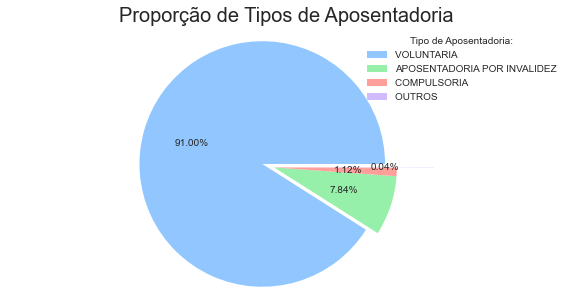

In [85]:
#Criando os gráficos
#Proporção de Tipos de Aposentadorias
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
plt.title('Proporção de Tipos de Aposentadoria', size=20)
explode = (0.1, 0, 0, 0.3)
plt.pie(tipo_aposentadoria.values,explode=explode, autopct='%1.2f%%')
plt.legend(labels = tipo_aposentadoria.index,title = "Tipo de Aposentadoria:")
plt.axis('equal')
plt.show()

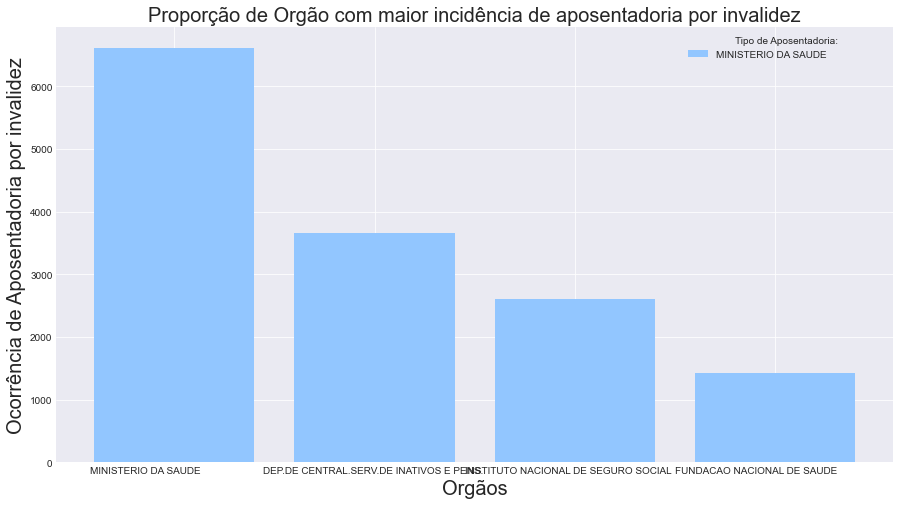

In [90]:
#Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.bar(tipo_invalidez_orgao_maiores_index,tipo_invalidez_orgao_maiores)
plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.legend(title = "Tipo de Aposentadoria:",labels = tipo_invalidez_orgao_maiores_index)
plt.xlabel('Orgãos', size=20)
plt.ylabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.show()

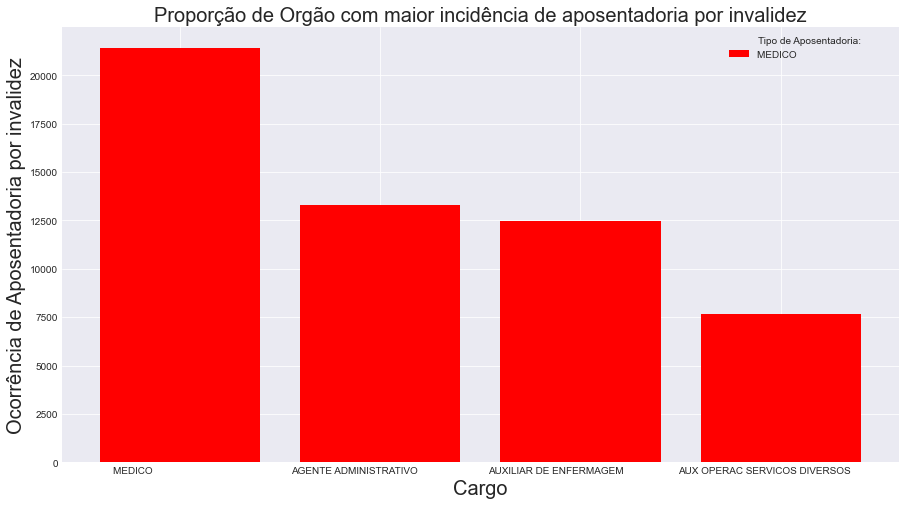

In [104]:
#Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.bar(tipo_cargos_invalidez.index[:4],tipo_cargos_invalidez.values[:4], color='')
plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.legend(title = "Tipo de Aposentadoria:",labels = tipo_cargos_invalidez.index[:4])
plt.xlabel('Cargo', size=20)
plt.ylabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.show()